In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from scipy.fft import ifft, fft, fftfreq, fftshift
from scipy.signal import find_peaks
from scipy.signal import hilbert, chirp

In [8]:
# decent color schemes for plots and such

colors=["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"]

colors_single = ['#fff5eb','#fee6ce','#fdd0a2','#fdae6b','#fd8d3c','#f16913','#d94801','#a63603','#7f2704']
colors_single.reverse()
zcorr_str = r"$\langle$ $\hat{S}_z (nT)$ $\hat{S}_z$ $\rangle$ (a.u.)"
xcorr_str = r"$\langle$ $\hat{S}_x (nT)$ $\hat{S}_x$ $\rangle$ (a.u.)"
mucorr_str = r"$\langle$ $\hat{S}_\mu (nT)$ $\hat{S}_\mu$ $\rangle$ (a.u.)"

plt.rcParams.update({'font.size': 14})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [9]:
def sma(data, window):
    hold = np.convolve(data, np.ones(window), "valid") / window
    return hold


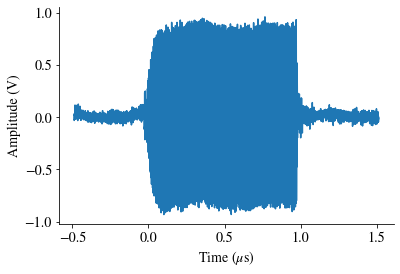

In [21]:
data_102 = np.loadtxt("pulse102_detailed.dat")

t = data_102.transpose()[0]*10**6
dt = (data_102.transpose()[0,1]-data_102.transpose()[0,0])*10**6
sig = data_102.transpose()[1]
plt.plot(t-3.5,sig)
plt.xlabel(r"Time ($\mu$s)")
plt.ylabel("Amplitude (V)")
plt.show()

In [11]:
dt*100

0.010000000000021927

In [12]:
len(sig)

20002

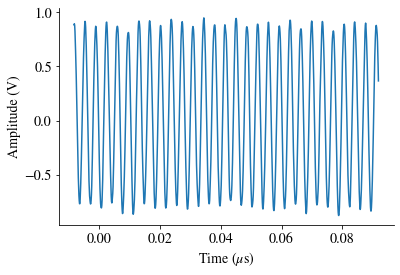

In [24]:
start=8000
end=9000
plt.plot(t[start:end]-3.82,sig[start:end])
plt.xlabel(r"Time ($\mu$s)")
plt.ylabel("Amplitude (V)")
plt.show()

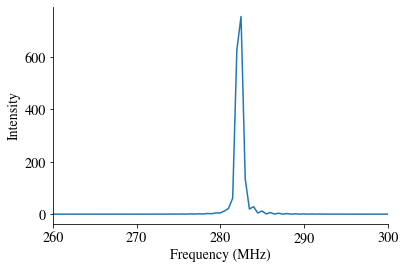

In [25]:
ft = fftshift(fft(sig, norm="ortho"))
N = len(ft)
freq = fftshift(fftfreq(N, dt))

plt.plot(freq,abs(ft)**2)
plt.xlim([260,300])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.show()

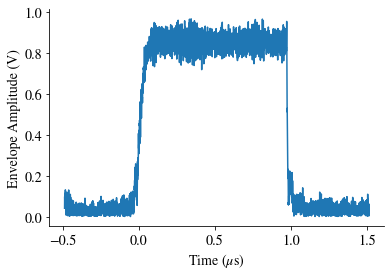

In [26]:
analytic_signal = hilbert(sig)
amplitude_envelope = np.abs(analytic_signal)
fs=dt
duration = t[-1]-t[0]
samples = N
plt.plot(t-3.5,amplitude_envelope)
plt.xlabel(r"Time ($\mu$s)")
plt.ylabel("Envelope Amplitude (V)")
plt.show()

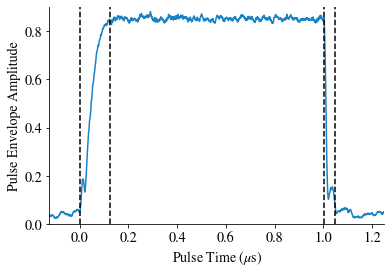

In [40]:
shift=-3.46
plt.plot(t[:-99]+shift,sma(amplitude_envelope,100),color=colors[0])

plt.axvline(0,color="black",linestyle="--")
plt.axvline(.125,color="black",linestyle="--")

plt.axvline(1.0025,color="black",linestyle="--")
plt.axvline(1.05,color="black",linestyle="--")

plt.xlabel(r"Pulse Time ($\mu$s)")
plt.ylabel("Pulse Envelope Amplitude")
plt.xlim([-.125,1.25])
plt.ylim([0,0.9])
plt.savefig("short_pulse_error.pdf",format='pdf',dpi=900,bbox_inches='tight')
plt.show()

t102 = t[:-99]+shift
sig102=sma(amplitude_envelope,100)

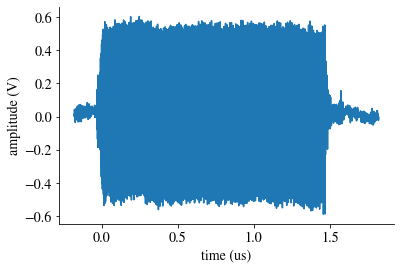

In [25]:
data_152 = np.loadtxt("pulse152_detailed.dat")

t = data_152.transpose()[0]*10**6
dt = (data_152.transpose()[0,1]-data_152.transpose()[0,0])*10**6
sig = data_152.transpose()[1]
plt.plot(t,sig)
plt.xlabel("time (us)")
plt.ylabel("amplitude (V)")
plt.show()

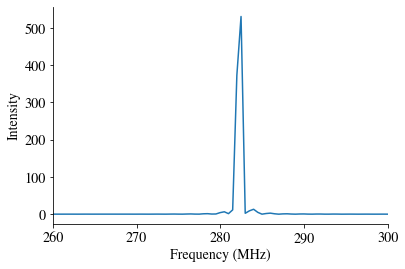

In [26]:
ft = fftshift(fft(sig, norm="ortho"))
N = len(ft)
freq = fftshift(fftfreq(N, dt))

plt.plot(freq,abs(ft)**2)
plt.xlim([260,300])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.show()

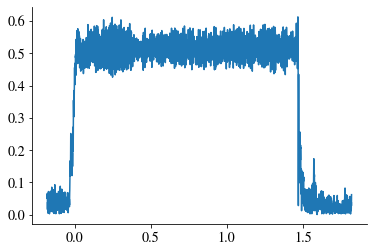

In [27]:
analytic_signal = hilbert(sig)
amplitude_envelope = np.abs(analytic_signal)
fs=dt
duration = t[-1]-t[0]
samples = N
plt.plot(t,amplitude_envelope)
plt.show()

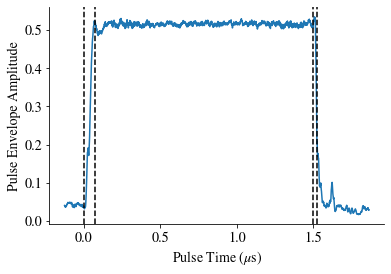

In [28]:
shift=+.0535
plt.plot(t[:-99]+shift,sma(amplitude_envelope,100))


plt.axvline(0,color="black",linestyle="--")
plt.axvline(.075,color="black",linestyle="--")

plt.axvline(1.4975,color="black",linestyle="--")
plt.axvline(1.525,color="black",linestyle="--")

plt.xlabel(r"Pulse Time ($\mu$s)")
plt.ylabel("Pulse Envelope Amplitude")
plt.show()

t152 = t[:-99]+shift
sig152=sma(amplitude_envelope,100)

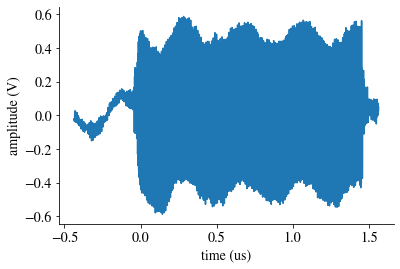

In [29]:
data_bad = np.loadtxt("bad_data.dat")

t = data_bad.transpose()[0]*10**6
dt = (data_bad.transpose()[0,1]-data_bad.transpose()[0,0])*10**6
sig = data_bad.transpose()[1]
plt.plot(t,sig)
plt.xlabel("time (us)")
plt.ylabel("amplitude (V)")
plt.show()

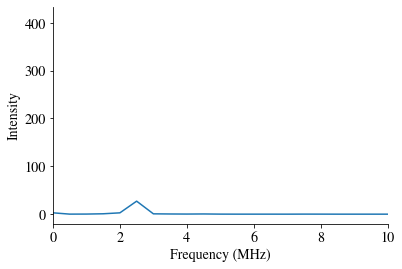

In [30]:
ft = fftshift(fft(sig, norm="ortho"))
N = len(ft)
freq = fftshift(fftfreq(N, dt))

plt.plot(freq,abs(ft)**2)
plt.xlim([0,10])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.show()

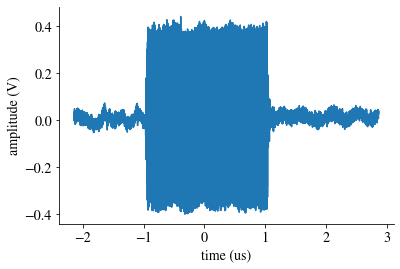

In [31]:
data_202 = np.loadtxt("pulse202_detailed.dat")

t = data_202.transpose()[0]*10**6
dt = (data_202.transpose()[0,1]-data_202.transpose()[0,0])*10**6
sig = data_202.transpose()[1]
plt.plot(t,sig)
plt.xlabel("time (us)")
plt.ylabel("amplitude (V)")
plt.show()

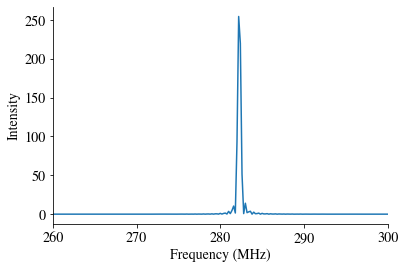

In [32]:
ft = fftshift(fft(sig, norm="ortho"))
N = len(ft)
freq = fftshift(fftfreq(N, dt))

plt.plot(freq,abs(ft)**2)
plt.xlim([260,300])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.show()

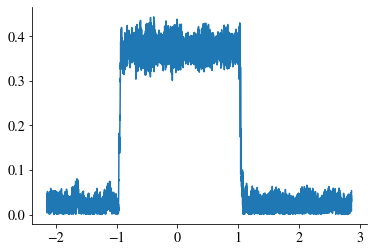

In [33]:
analytic_signal = hilbert(sig)
amplitude_envelope = np.abs(analytic_signal)
fs=dt
duration = t[-1]-t[0]
samples = N
plt.plot(t,amplitude_envelope)
plt.show()

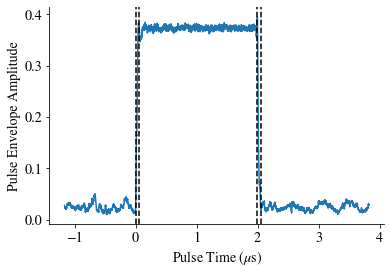

In [34]:
shift=1.-.025
plt.plot(t[:-99]+shift,sma(amplitude_envelope,100))


plt.axvline(0,color="black",linestyle="--")
plt.axvline(.05,color="black",linestyle="--")

plt.axvline(1.9975,color="black",linestyle="--")
plt.axvline(2.05,color="black",linestyle="--")

plt.xlabel(r"Pulse Time ($\mu$s)")
plt.ylabel("Pulse Envelope Amplitude")
plt.show()

t202 = t[:-99]+shift
sig202=sma(amplitude_envelope,100)

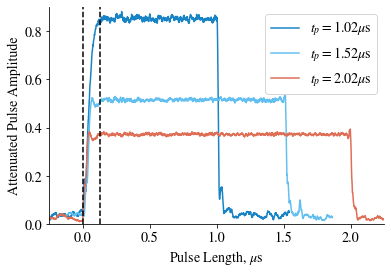

In [35]:
plt.plot(t102,sig102,label=r"$t_p = 1.02 \mu$s",color=colors[0])
plt.plot(t152,sig152,label=r"$t_p = 1.52 \mu$s",color=colors[2])
plt.plot(t202,sig202,label=r"$t_p = 2.02 \mu$s",color=colors[6])
plt.ylim([0,.9])
plt.xlim([-.25,2.25])
plt.axvline(0,color="black",linestyle="--")
plt.axvline(.125,color="black",linestyle="--")
plt.xlabel(r"Pulse Length, $\mu$s")
plt.ylabel(r"Attenuated Pulse Amplitude")
plt.legend()

plt.savefig("pulse_comparison.pdf",format='pdf',dpi=900,bbox_inches='tight')
plt.show()